# <center> Analyzing Road Accident Causes in London's District Areas: A Comprehensive Study Using Machine Learning and Python Tools for Proactive Road Safety Management
### <center><b> Carreon, Ma. Addine  |  Lucas, Sydney

**RESEARCH OBJECTIVES**

The main purpose of this case study is to identify and analyze contributing factors that lead to the London district area’s road accident.

1.	To determine and analyze the main contributing factors to road accidents’ severity in London, focusing on the relationship of particular variables such as road surface condition, weather condition, and vehicle type. 

        a.	This aims to comprehend better the factors that lead to road accidents.

2.	To assess the geographical distribution of road accidents throughout several district areas in London, leveraging road accidents' severity within London's district regions, incorporating variables including the geospatial information. 

        a.	This aim is to contribute to identifying high-risk and low-risk areas which demand targeted road safety actions. 
    
**HYPOTHESIS** 

1.	Null Hypothesis

a.	There is no significant association between Road_Surface_Conditions and Accident_Severity.

b.	There is no significant association between Weather_Conditions and Accident_Severity.

c.	There is no significant association between Vehicle_Type and Accident_Severity.

2.	Alternative Hypothesis

a.	There is a significant association between Road_Surface_Conditions and Accident_Severity.

b.	There is a significant association between Weather_Conditions and Accident_Severity.

c.	There is a significant association between Vehicle_Type and Accident_Severity.

# IMPORT

In [1]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate

# DATA COLLECTION AND OVERVIEW

In [3]:
data = pd.read_csv('accident data.csv')

In [4]:
data

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [5]:
data.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [6]:
data.shape

(660679, 14)

In [7]:
# rename
data.rename(columns = {'Accident Date': 'Accident_Date', 'District Area': 'District_Area'}, inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident_Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District_Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [9]:
list_categorical_features = ['Index', 'Accident_Severity', 'Light_Conditions', 'District_Area', 'Road_Surface_Conditions', 
    'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type']
data[list_categorical_features] = data[list_categorical_features].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  category
 2   Accident_Date            660679 non-null  object  
 3   Latitude                 660654 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District_Area            660679 non-null  category
 6   Longitude                660653 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  659953 non-null  category
 10  Road_Type                656159 non-null  category
 11  Urban_or_Rural_Area      660664 non-null  category
 12  Weather_Conditions       646551 non-null  category
 13  Vehicle_Type             660679 non-null  ca

In [10]:
# subsetting
data = data[[
 
    'Accident_Severity', 'Accident_Date', 'Latitude',
    'Light_Conditions', 'District_Area', 'Longitude',
    'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
    'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
    'Vehicle_Type'
]].copy()

In [11]:
# to_datetime
data['Accident_Date'] = pd.to_datetime(data['Accident_Date'], dayfirst = True)
data['Year'] = data['Accident_Date'].dt.year
data.head()

,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year
0,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019
1,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019
2,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car,2019
3,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019
4,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle,2019


In [12]:
# missing values
data.isnull().sum()

Accident_Severity              0
Accident_Date                  0
Latitude                      25
Light_Conditions               0
District_Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
Year                           0
dtype: int64

In [13]:
data.loc[data.duplicated()].head()

,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year
18398,Slight,2019-04-05,51.474388,Daylight,Wandsworth,-0.176344,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019
30232,Slight,2019-12-01,53.634450,Darkness - no lighting,Chorley,-2.594165,1,1,Wet or damp,Dual carriageway,Rural,Raining no high winds,Car,2019
30904,Slight,2019-10-29,53.338433,Daylight,Wirral,-3.021683,1,2,Wet or damp,Dual carriageway,Rural,Raining no high winds,Car,2019
40515,Slight,2019-02-01,53.550845,Darkness - lights lit,Rochdale,-2.182447,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Car,2019
53086,Slight,2019-10-18,53.970341,Daylight,Harrogate,-1.405573,1,2,Dry,Single carriageway,Rural,Other,Car,2019


In [14]:
# dropping duplicated rows and missing values
data = data.loc[~data.duplicated()].reset_index(drop = True).copy()
data = data.dropna()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 642745 entries, 0 to 660626
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Accident_Severity        642745 non-null  category      
 1   Accident_Date            642745 non-null  datetime64[ns]
 2   Latitude                 642745 non-null  float64       
 3   Light_Conditions         642745 non-null  category      
 4   District_Area            642745 non-null  category      
 5   Longitude                642745 non-null  float64       
 6   Number_of_Casualties     642745 non-null  int64         
 7   Number_of_Vehicles       642745 non-null  int64         
 8   Road_Surface_Conditions  642745 non-null  category      
 9   Road_Type                642745 non-null  category      
 10  Urban_or_Rural_Area      642745 non-null  category      
 11  Weather_Conditions       642745 non-null  category      
 12  Vehicle_Type         

# EXPLORATORY DATA ANALYSIS

# Descriptive Analysis

In [16]:
display(data.describe().round(3).T) # numerical
display(data.describe(include = ['object', 'bool', 'category']).T) # categorical

,count,mean,min,25%,50%,75%,max,std
Accident_Date,642745,2020-12-01 11:37:15.400353280,2019-01-01 00:00:00,2019-11-28 00:00:00,2020-11-14 00:00:00,2021-11-18 00:00:00,2022-12-31 00:00:00,NaN
Latitude,642745.0,52.554,49.914,51.49,52.305,53.456,60.758,1.41
Longitude,642745.0,-1.425,-7.516,-2.321,-1.406,-0.229,1.762,1.382
Number_of_Casualties,642745.0,1.36,1.0,1.0,1.0,1.0,68.0,0.828
Number_of_Vehicles,642745.0,1.833,1.0,1.0,2.0,2.0,32.0,0.717
Year,642745.0,2020.412,2019.0,2019.0,2020.0,2021.0,2022.0,1.11


,count,unique,top,freq
Accident_Severity,642745,3,Slight,547670
Light_Conditions,642745,5,Daylight,471884
District_Area,642745,422,Birmingham,12980
Road_Surface_Conditions,642745,5,Dry,433943
Road_Type,642745,5,Single carriageway,482247
Urban_or_Rural_Area,642745,3,Urban,408898
Weather_Conditions,642745,8,Fine no high winds,517839
Vehicle_Type,642745,16,Car,484443


# Univariate Analysis
In this section, the statistical method approach is presented and focuses on understanding patterns and attributes that connect with additional variables. The analysis of univariate is to summarize the data’s central inclination that creates significant implication. 

## Numerical
### Number of Casualties

Number_of_Casualties
1     489091
2     105778
3      30268
4      10956
5       4074
6       1512
7        527
8        212
9        112
10        57
11        36
12        20
13        22
14        12
15        11
16         7
17         8
18         6
19         7
21         3
22         5
24         2
25         1
26         1
27         2
28         1
29         3
32         1
40         2
42         2
43         1
45         1
47         1
48         1
62         1
68         1
Name: Number_of_Casualties, dtype: int64


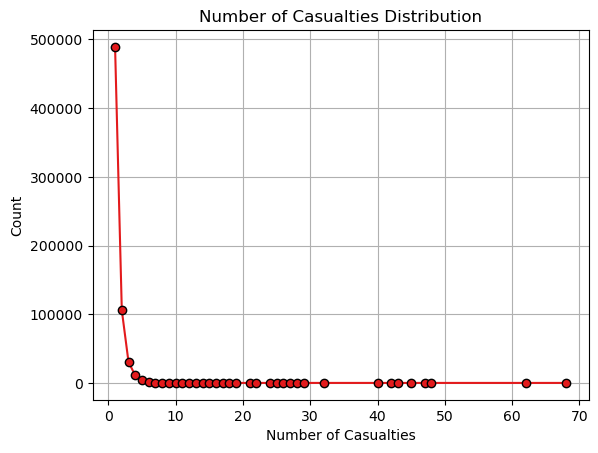

In [17]:
Number_of_Casualties = data.groupby('Number_of_Casualties')['Number_of_Casualties'].count()
print(Number_of_Casualties)

# Graph
Number_of_Casualties = data.groupby('Number_of_Casualties')['Number_of_Casualties'].count()
colors = sns.color_palette("Paired")

plt.plot(Number_of_Casualties.index, Number_of_Casualties.values, marker='o', linestyle='-', color=colors[5], markeredgecolor='black')
plt.xlabel('Number of Casualties')
plt.ylabel('Count')
plt.title('Number of Casualties Distribution')
plt.grid(True)
plt.show()

The distribution counts how many victims got into an accident or how many individuals are involved in the road accident. In this case, the surge of casualties in the range of near zeroes implies that there are more casualties in a road accident with the few to only one individual. The number of casualties that appear to a single individual occurred almost 500,00 times. The downward trend implies that the degree of accidents with many individuals is low compared to few and single people. 

### Number of Vehicles

Number_of_Vehicles
1     195058
2     381059
3      51807
4      11091
5       2423
6        747
7        293
8        144
9         56
10        25
11        12
12         7
13         6
14         9
15         1
16         4
19         1
28         1
32         1
Name: Number_of_Vehicles, dtype: int64


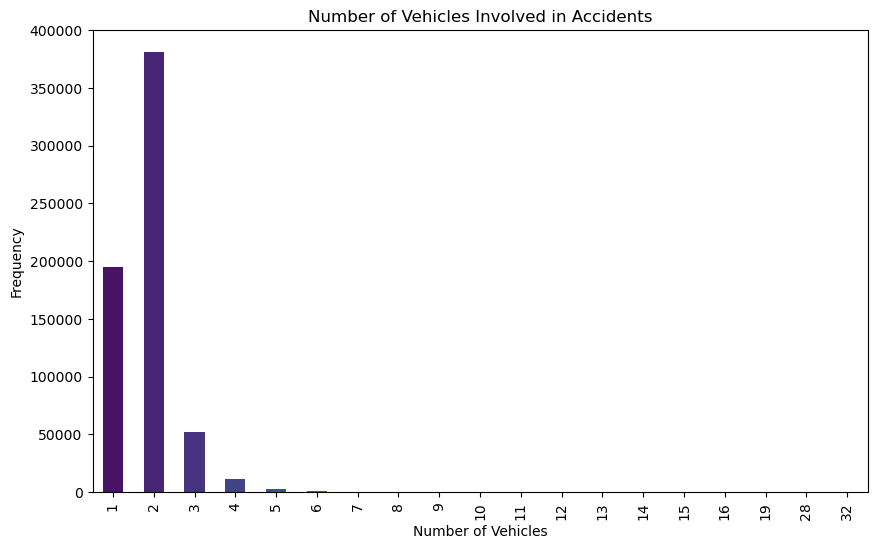

In [18]:
Number_of_Vehicles = data.groupby('Number_of_Vehicles')['Number_of_Vehicles'].count()
print(Number_of_Vehicles)

# Graph
vehicle_counts = Number_of_Vehicles.sort_index()  # Fix the variable name here
number_of_vehicles_palette = sns.color_palette("viridis", n_colors=len(vehicle_counts))

plt.figure(figsize=(10, 6))
vehicle_counts.plot(kind='bar', color=number_of_vehicles_palette)
plt.title('Number of Vehicles Involved in Accidents')
plt.xlabel('Number of Vehicles')  
plt.ylabel('Frequency')
plt.show()

The graph reveals that two-vehicle accidents are the most frequent, with fewer incidents involving three or more vehicles. Collisions involving ten or more vehicles are rare. In terms of casualties and the number of vehicles, there is a higher frequency in smaller scales. One to four casualties and two-vehicle accidents are prominent, indicating a correlation between fewer casualties and a lower number of vehicles involved.

## Categorical
### Accident Severity Distribution

Accident_Severity
Fatal        8524
Serious     86551
Slight     547670
Name: Accident_Severity, dtype: int64


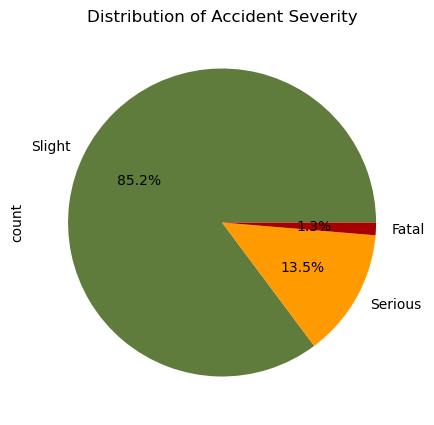

In [19]:
accident_sum = data.groupby('Accident_Severity')['Accident_Severity'].count()
print(accident_sum)

# Graph
severity_colors = {'Fatal': '#a70000', 'Serious': '#ff9a00', 'Slight': '#607c3c'}
plt.figure(figsize=(8, 5))
data['Accident_Severity'].value_counts().plot.pie(autopct='%1.1f%%', colors=[severity_colors['Slight'], severity_colors['Serious'], severity_colors['Fatal']])
plt.title('Distribution of Accident Severity')
plt.show()

The data shows that the majority of road accidents result in slight damage (85.2%), followed by serious damage (13.5%) and fatal damage (1.3%). This suggests that most accidents lead to moderate or minor harm, though serious and fatal incidents still have notable impact. The findings highlight the importance of preventive measures, especially given the prevalence of slight damages in road accidents.

### Road Surface Conditions Distribution

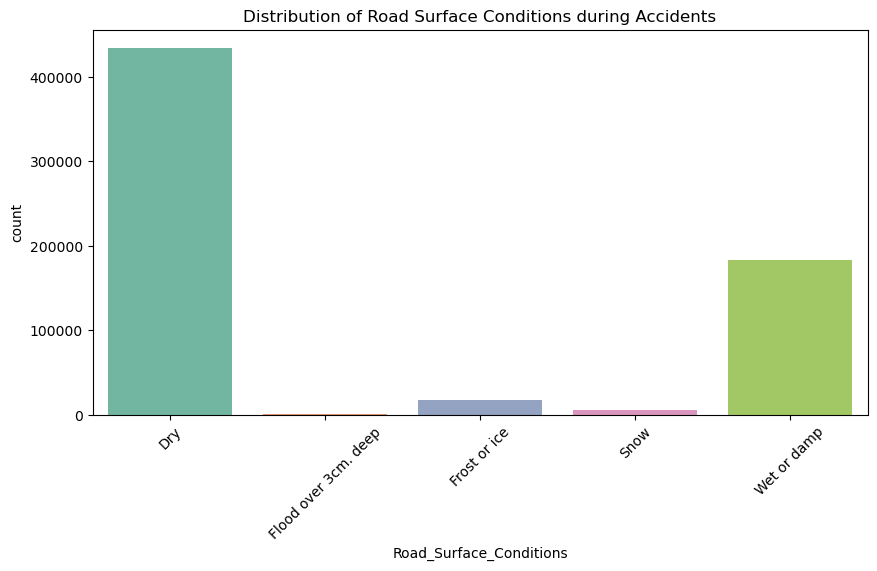

In [20]:
road_surface_palette = sns.color_palette("Set2", n_colors=len(data['Road_Surface_Conditions'].unique()))
plt.figure(figsize=(10, 5))
sns.countplot(x='Road_Surface_Conditions', data=data, palette=road_surface_palette)
plt.title('Distribution of Road Surface Conditions during Accidents')
plt.xticks(rotation=45)
plt.show()

The data indicates that dry road conditions have the highest occurrence, with over 400,000 incidents, followed by wet or damp conditions. The lowest occurrences are associated with flood, frost, and snow. This implies that road accidents are more common on dry or wet days rather than during storms. The findings suggest that more vehicles are on the road during dry and wet seasons, while fewer are present during snowy conditions, possibly due to people avoiding travel in snowy weather.

### Weather Conditions Distribution

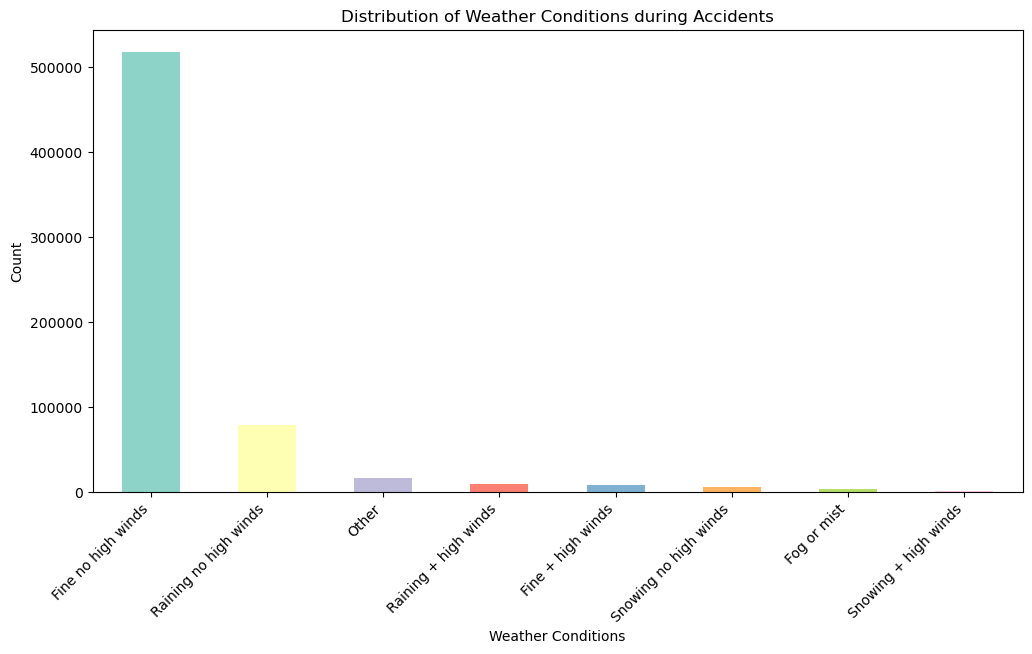

In [21]:
weather_conditions_palette = sns.color_palette("Set3", n_colors=len(data['Weather_Conditions'].unique()))
plt.figure(figsize=(12, 6))
data['Weather_Conditions'].value_counts().plot(kind='bar', color=weather_conditions_palette)
plt.title('Distribution of Weather Conditions during Accidents')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

The bar graph highlights that fine weather conditions, specifically, fine with no high winds, are the most common during road accidents, accounting for over 400,000 incidents. Rain with no high winds follows, causing fewer than 100,000 accidents. This underscores the significance of road surface conditions, with dry surfaces being the highest. In summary, road accidents predominantly occur in fine weather with no high winds and on dry road surfaces.

### Vehicle Type Distribution

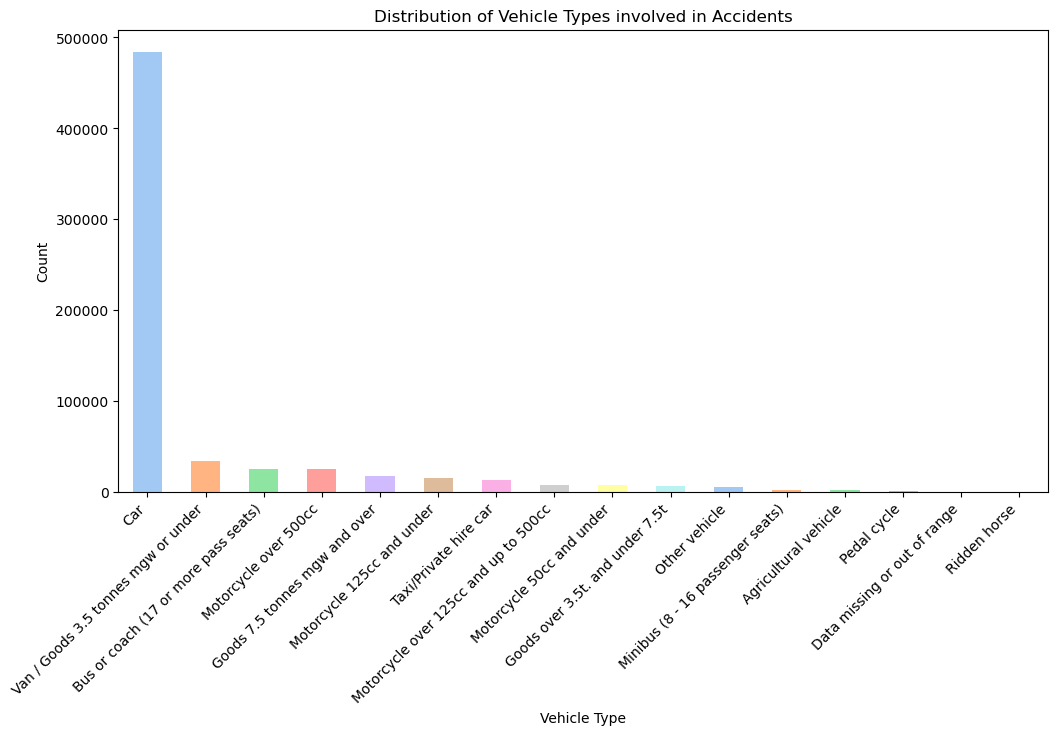

In [22]:
vehicle_type_palette = sns.color_palette("pastel", n_colors=len(data['Vehicle_Type'].unique()))
plt.figure(figsize=(12, 6))
data['Vehicle_Type'].value_counts().plot(kind='bar', color=vehicle_type_palette)
plt.title('Distribution of Vehicle Types involved in Accidents')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bivariate Analysis
Given that numerical and categorical values are distributed with interpretations, the relationship and connections between variables are then identified and elaborated. The provided analysis will determine the level and nature of association between the variables. 

## Number of Casualties per Number of Vehicle

Number_of_Vehicles
1     228727
2     525162
3      88854
4      22167
5       5625
6       1947
7        889
8        495
9        189
10        96
11        48
12        16
13        47
14        49
15         5
16        24
19        13
28        16
32         5
Name: Number_of_Casualties, dtype: int64


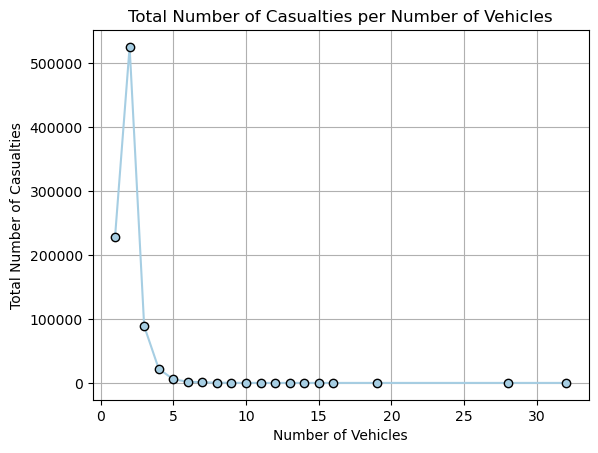

In [23]:
casualties_per_vehicle = data.groupby('Number_of_Vehicles')['Number_of_Casualties'].sum()
print(casualties_per_vehicle)

# Graph
casualties_per_vehicle = data.groupby('Number_of_Vehicles')['Number_of_Casualties'].sum()
colors = sns.color_palette("Paired")

plt.plot(casualties_per_vehicle.index, casualties_per_vehicle.values, marker='o', linestyle='-', color=colors[0], markeredgecolor='black')
plt.xlabel('Number of Vehicles')
plt.ylabel('Total Number of Casualties')
plt.title('Total Number of Casualties per Number of Vehicles')
plt.grid(True)
plt.show()

The graph illustrates the relationship between the number of vehicles and total casualties. It shows a correlation where accidents involving fewer vehicles result in higher casualties. This implies that incidents with a smaller number of cars may have a disproportionate impact on casualties, possibly due to higher speeds compared to congested road conditions.

## Relationship between Accident Severity and Road Surface Conditions

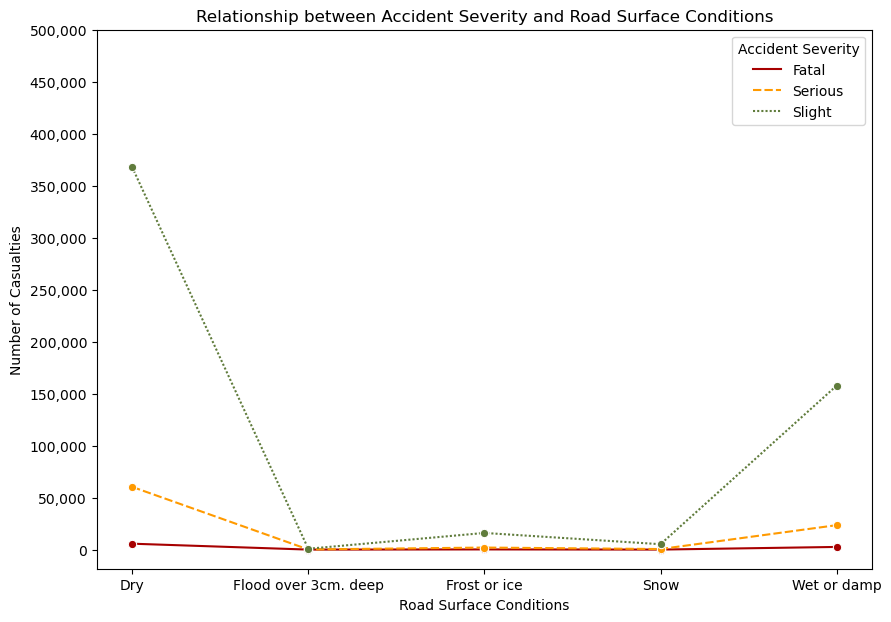

In [24]:
#Filter
selected_columns = ['Accident_Severity', 'Road_Surface_Conditions']
filtered_data = data[selected_columns]

# Drop rows with missing values in the selected columns
filtered_data = filtered_data.dropna(subset=selected_columns)

# Count data
count_data = filtered_data.groupby(selected_columns).size().reset_index(name='Count')

# Pivot table
pivot_data = count_data.pivot_table(index='Road_Surface_Conditions', columns='Accident_Severity', values='Count', fill_value=0)
severity_colors = {'Fatal': '#a70000', 'Serious': '#ff9a00', 'Slight': '#607c3c'}

plt.figure(figsize=(10, 7))
sns.lineplot(data=pivot_data, marker='o', hue_order=['Fatal', 'Serious', 'Slight'], palette=severity_colors)
plt.yticks(range(0, 510000, 50000), [f'{i:,}' for i in range(0, 510000, 50000)])
plt.title('Relationship between Accident Severity and Road Surface Conditions')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Casualties')
plt.legend(title='Accident Severity')
plt.show()

The road surface data indicates that dry roads are most associated with accidents, with the highest severity being slight. This implies that casualties on dry roads primarily result from slight accidents, showing low fatal severity and average severity but high slight severity. Similarly, wet or damp roads follow the same pattern, emphasizing high slight severity and minimal serious and fatal severity. Other road conditions show low casualties across the three severity types. In summary, casualties are predominantly of slight severity during dry and wet road conditions, contrasting with snow roads.

## Relationship between Accident Severity and Weather Conditions

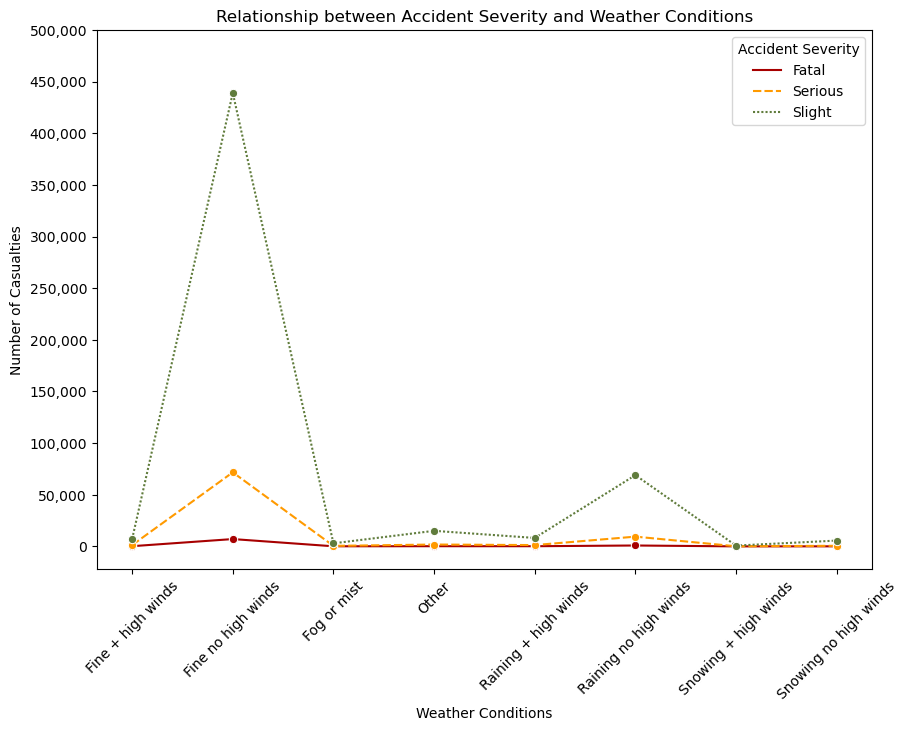

In [25]:
# Filter
selected_columns = ['Accident_Severity', 'Weather_Conditions']
filtered_data = data[selected_columns]

# Drop rows with missing values in the selected columns
filtered_data = filtered_data.dropna(subset=selected_columns)

# Count data
count_data = filtered_data.groupby(selected_columns).size().reset_index(name='Count')

# Pivot table
pivot_data = count_data.pivot_table(index='Weather_Conditions', columns='Accident_Severity', values='Count', fill_value=0)
severity_colors = {'Fatal': '#a70000', 'Serious': '#ff9a00', 'Slight': '#607c3c'}

plt.figure(figsize=(10, 7))
sns.lineplot(data=pivot_data, marker='o', hue_order=['Fatal', 'Serious', 'Slight'], palette=severity_colors)
plt.yticks(range(0, 510000, 50000), [f'{i:,}' for i in range(0, 510000, 50000)])
plt.title('Relationship between Accident Severity and Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Casualties')
plt.legend(title='Accident Severity')
plt.xticks(rotation = 45)
plt.show()

The weather condition illustration highlights that fine weather with no high winds has the highest number of casualties, primarily with slight severity and fewer serious and fatal accidents. Similarly, rainy weather with no high winds is the second-highest condition, with a correlation to high slight severity and minimal serious and fatal accidents. In summary, casualties during fine weather are above average, predominantly slight, while rainy weather shows evident casualties but with slight severity.

## Relationship between Accident Severity and Vehicle Type

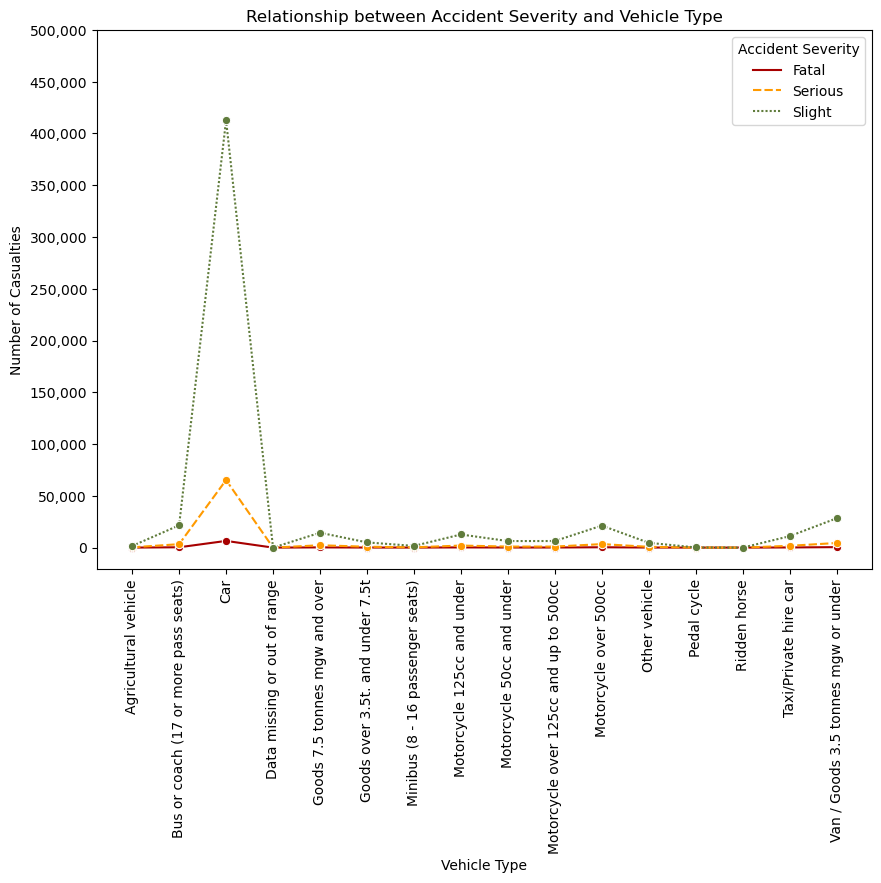

In [26]:
# Filter 
selected_columns = ['Accident_Severity', 'Vehicle_Type']
filtered_data = data[selected_columns]

# Drop rows with missing values in the selected columns
filtered_data = filtered_data.dropna(subset=selected_columns)

# Count data
count_data = filtered_data.groupby(selected_columns).size().reset_index(name='Count')

# Pivot table
pivot_data = count_data.pivot_table(index='Vehicle_Type', columns='Accident_Severity', values='Count', fill_value=0)
severity_colors = {'Fatal': '#a70000', 'Serious': '#ff9a00', 'Slight': '#607c3c'}

plt.figure(figsize=(10, 7))
sns.lineplot(data=pivot_data, marker='o', hue_order=['Fatal', 'Serious', 'Slight'], palette=severity_colors)
plt.yticks(range(0, 510000, 50000), [f'{i:,}' for i in range(0, 510000, 50000)])
plt.title('Relationship between Accident Severity and Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Casualties')
plt.legend(title='Accident Severity')
plt.xticks(rotation = 90)
plt.show()

The vehicle type illustration indicates that cars have the highest count of casualties, predominantly with slight severity and fewer serious and fatal severities. Vans follow cars in the count of casualties but with similar distributions of severity. Overall, the graph highlights that cars, being the most commonly employed vehicle type, account for the highest number of casualties, primarily with slight severity.

# Multivariate Analysis
In this section, the analysis of more than two variables is examined. This analysis focuses on simulating the relationship of a quantity of variables to understand the factors of one another.

## Number of Casualties and Vehicles by Accident Severity

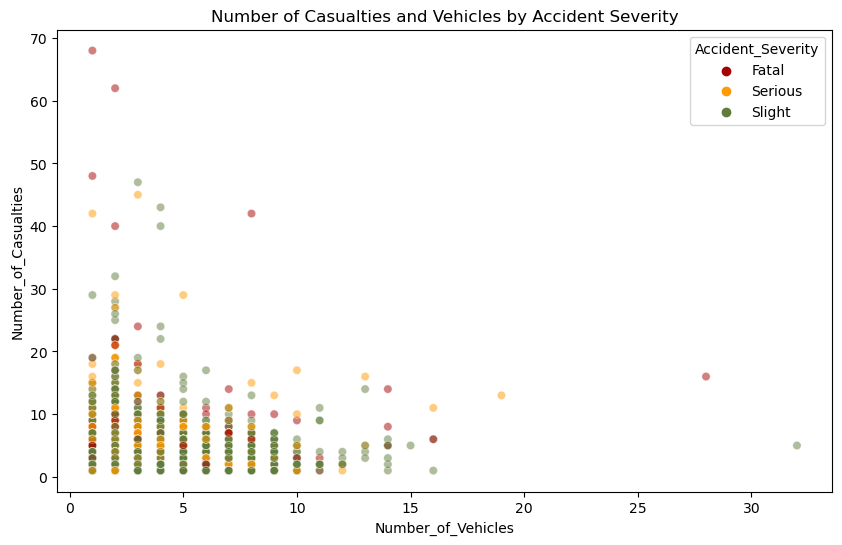

In [27]:
severity_colors = {'Fatal': '#a70000', 'Serious': '#ff9a00', 'Slight': '#607c3c'}
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number_of_Vehicles', y='Number_of_Casualties', hue='Accident_Severity', data=data, palette=severity_colors, alpha=0.5)
plt.title('Number of Casualties and Vehicles by Accident Severity')
plt.show()

The graph illustrates the correlation between the number of vehicle types and the severity of road accidents. It shows that when two vehicles are involved, there is an increase in the number of casualties, mainly with slight severity. In contrast, a higher number of vehicles involved result in fewer casualties, with almost no slight severity observed.

# Geospatial Analysis
This case study aims to identify high-risk and low-risk areas in the district areas of London. Hence, this section provides an analysis on visualizing data that has geographic components to locate coordinated road safety percussion. 

## Geographical Distribution of Accidents

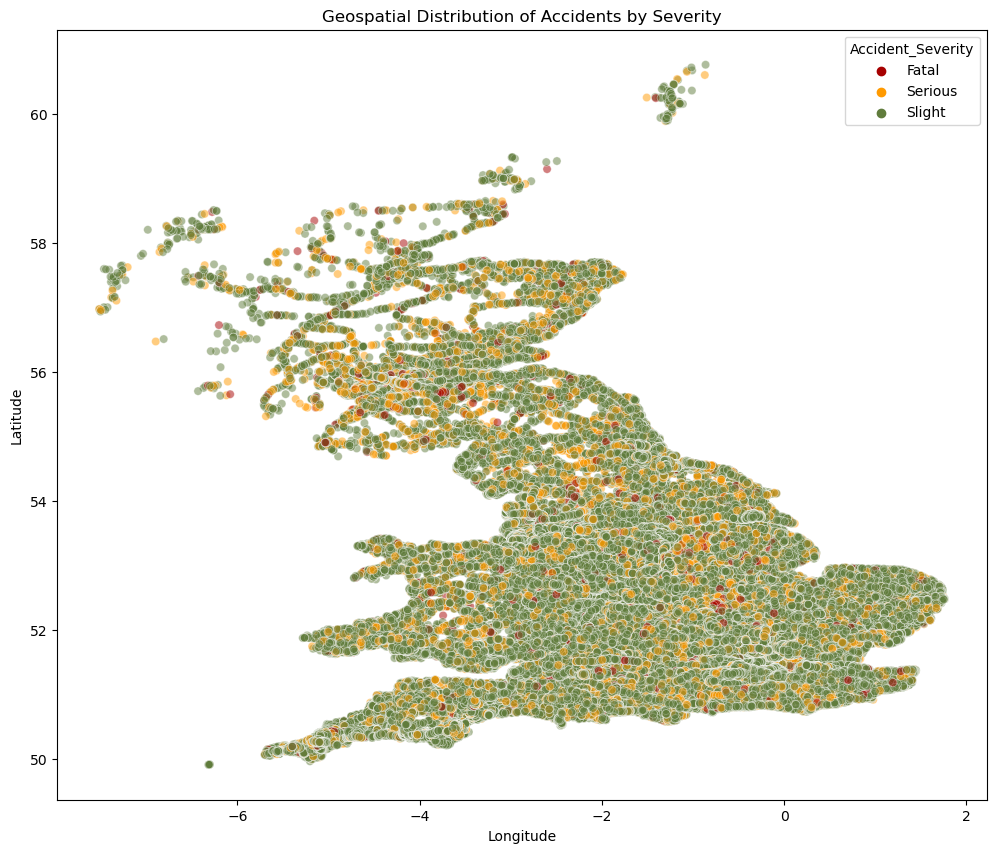

In [28]:
plt.figure(figsize=(12, 10))
severity_colors = {'Fatal': '#a70000', 'Serious': '#ff9a00', 'Slight': '#607c3c'}
sns.scatterplot(x='Longitude', y='Latitude', hue='Accident_Severity', data=data, palette=severity_colors, alpha=0.5)
plt.title('Geospatial Distribution of Accidents by Severity')
plt.show()

The graph reveals that the majority of district areas in London experience almost slight accident severity, aligning with the pie chart where slight severity is the most prevalent. This indicates a consistent trend of low or slight accident severity across London districts, contrasting with serious and fatal damage.

# HYPOTHESIS TESTING
## Road Surface Conditions

In [29]:
road_crosstab = pd.crosstab(data['Accident_Severity'], data['Road_Surface_Conditions'])
road_crosstab

Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp
Accident_Severity,,,,,
Fatal,5699,21,189,35,2580
Serious,60348,150,1978,559,23516
Slight,367896,823,16038,5207,157706


In [30]:
res = stats.chi2_contingency(road_crosstab)
p_value = res.pvalue
print(f'P-value = {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant association between Road_Surface_Conditions and Accident_Severity.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Road_Surface_Conditions and Accident_Severity.")

P-value = 8.842137556654657e-77
Reject the null hypothesis. There is a significant association between Road_Surface_Conditions and Accident_Severity.


After cross-tabulation, a p-value of 8.8421e-77 was obtained, leading to the rejection of the null hypothesis. This indicates a significant association between Road_Surface_Conditions and Accident_Severity. The graph illustrates that dry and wet roads are linked to an increased number of casualties, emphasizing slight accident severity.

## Weather Conditions

In [31]:
weather_crosstab = pd.crosstab(data['Accident_Severity'], data['Weather_Conditions'])
weather_crosstab

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds
Accident_Severity,,,,,,,,
Fatal,175,7074,81,163,145,848,3,35
Serious,1241,71690,480,1789,1255,9425,109,562
Slight,7084,439075,2943,15055,8159,68979,766,5609


In [32]:
res = chi2_contingency(weather_crosstab)
p_value = res.pvalue
print(f'P-value = {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant association between Weather_Conditions and Accident_Severity.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Weather_Conditions and Accident_Severity.")

P-value = 4.76769271031892e-131
Reject the null hypothesis. There is a significant association between Weather_Conditions and Accident_Severity.


Cross-tabulation yielded a p-value of 4.7677e-13, prompting the rejection of the null hypothesis. This signifies a significant association between Weather_Conditions and Accident_Severity. Fine weather with no high winds emerges as the predominant factor in accidents, suggesting that even in good weather conditions, accidents occur with slight severity.

## Vehicle Type

In [33]:
vehicle_crosstab = pd.crosstab(data['Accident_Severity'], data['Vehicle_Type'])
vehicle_crosstab

Vehicle_Type,Agricultural vehicle,Bus or coach (17 or more pass seats),Car,Data missing or out of range,Goods 7.5 tonnes mgw and over,Goods over 3.5t. and under 7.5t,Minibus (8 - 16 passenger seats),Motorcycle 125cc and under,Motorcycle 50cc and under,Motorcycle over 125cc and up to 500cc,Motorcycle over 500cc,Other vehicle,Pedal cycle,Ridden horse,Taxi/Private hire car,Van / Goods 3.5 tonnes mgw or under
Accident_Severity,,,,,,,,,,,,,,,,
Fatal,20,320,6470,0,211,63,28,189,95,104,335,70,6,0,152,461
Serious,274,3311,65258,0,2274,839,268,1984,991,989,3388,741,37,0,1735,4462
Slight,1598,21511,412715,5,14372,5035,1633,12673,6336,6366,21261,4638,146,4,11049,28328


In [34]:
res = chi2_contingency(vehicle_crosstab)
p_value = res.pvalue
print(f'P-value = {p_value}')

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant association between Vehicle_Type and Accident_Severity.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Vehicle_Type and Accident_Severity.")

P-value = 0.46896291783548794
Fail to reject the null hypothesis. There is no significant association between Vehicle_Type and Accident_Severity.


With a p-value of 0.4690, the null hypothesis is not rejected, indicating no significant association between Vehicle_Type and Accident_Severity. The data fails to provide sufficient evidence supporting a correlation between vehicle types and accident severity, suggesting that the type of vehicle used does not significantly contribute to the severity of accidents.

# BOOTSTRAPPING
In this section, the executed bootstrapping is utilized to estimate the distribution to generate samples from the provided data. This identifies the potential uncertainty occurring in the chi-square test statistic. 

In [35]:
num_bootstrap_samples = 5

## Road Surface Conditions
### Road Surface Conditions Bootstrap Sample

Bootstrap Sample 5 Results:
+-------------------+--------+----------------------+--------------+------+-------------+
| Accident_Severity |  Dry   | Flood over 3cm. deep | Frost or ice | Snow | Wet or damp |
+-------------------+--------+----------------------+--------------+------+-------------+
|       Fatal       |  5763  |          19          |     161      |  43  |    2556     |
|      Serious      | 60412  |         143          |     2039     | 549  |    23603    |
|      Slight       | 367332 |         843          |    16184     | 5238 |   157860    |
+-------------------+--------+----------------------+--------------+------+-------------+
Chi-square: 376.0511862580778
P-value: 2.471551228242141e-76
Bootstrap Decision: Reject the null hypothesis: There is a significant association between Road_Surface_Conditions and Accident_Severity.



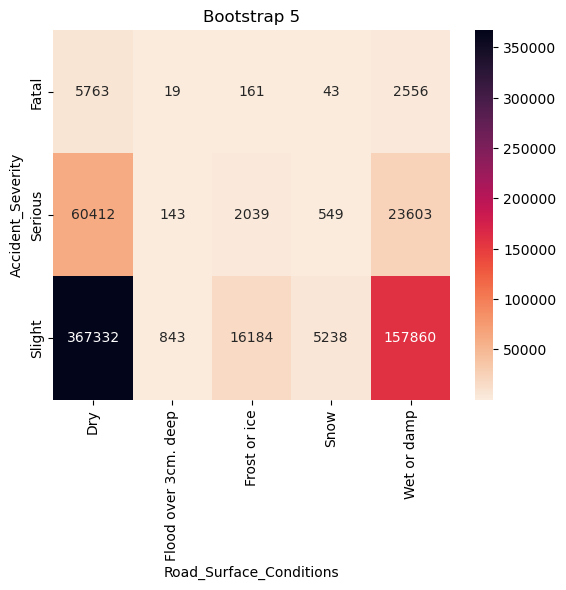

In [36]:
for i in range(num_bootstrap_samples):
    resampled_data = resample(data)
    resampled_crosstab = pd.crosstab(resampled_data['Accident_Severity'], resampled_data['Road_Surface_Conditions'])

    # Chi-square test
    chi2, p, _, _ = chi2_contingency(resampled_crosstab)

    # Expected frequencies
    expected_frequencies = np.outer(resampled_crosstab.sum(axis=1), resampled_crosstab.sum(axis=0)) / resampled_crosstab.sum().sum()

    # Chi-square statistic
    chi2_statistic = np.sum((resampled_crosstab.values - expected_frequencies)**2 / expected_frequencies)

    # Df
    degrees_of_freedom = (resampled_crosstab.shape[0] - 1) * (resampled_crosstab.shape[1] - 1)

    # Critical value and p-value
    critical_value = chi2
    alpha = 0.05
    p_value = p

    # Make a decision
    if chi2_statistic > critical_value or p_value < alpha:
        result = "Reject the null hypothesis: There is a significant association between Road_Surface_Conditions and Accident_Severity."
    else:
        result = "Fail to reject the null hypothesis: There is no significant association between Road_Surface_Conditions and Accident_Severity."

    table = tabulate(resampled_crosstab, headers='keys', tablefmt='pretty')

    if i == num_bootstrap_samples - 1:  
        print(f"\033[1mBootstrap Sample {i + 1} Results:\033[0m")
        print(f"{table}")
        print(f"\033[1mChi-square:\033[0m {chi2_statistic}")
        print(f"\033[1mP-value:\033[0m {p_value}")
        print(f"\033[1mBootstrap Decision: {result}\033[0m\n")

        sns.heatmap(resampled_crosstab, annot=True, fmt="d", cmap="rocket_r")
        plt.title(f"Bootstrap {i + 1}")
        plt.show()

The table and heatmap illustrate the correlation between categorical road surface conditions and accident severity. The data suggests that accidents on dry roads are more than double those on wet or damp roads, indicating higher risk on dry surfaces. Dry roads also show nearly twice as many fatal, serious, and slight accidents compared to wet or damp roads. Other road surfaces have low data values with small quantities. The heatmap reinforces that numerical findings are notably higher on both dry and wet roads, but dry roads consistently exhibit more accidents and severity than wet roads.

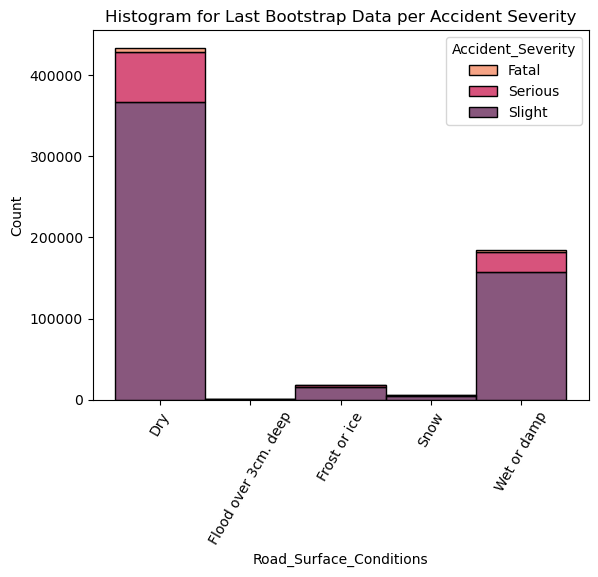

In [37]:
last_bootstrap_data = resampled_data

sns.histplot(data=last_bootstrap_data, x='Road_Surface_Conditions', hue='Accident_Severity', multiple='stack', palette='rocket_r', binwidth=0.001)
plt.xticks(rotation=60)
plt.title("Histogram for Last Bootstrap Data per Accident Severity")
plt.show()

The histogram findings align effectively with the heat map data. Bootstrapping indicates a higher count in dry road surface conditions. Dry roads also exhibit a high frequency of slight accident severity. A study by Ismael and Razzaq (2017) on Manchester-UK between 2011 to 2015 found more accidents on dry roads than on rainy days. This study's findings support that correlation, showing more accidents occurring on dry roads compared to wet roads.

After the bootstrap execution, the numerical data are utilized to compute the chi-square and the p-value. Results showed that the chi-squared is 366.4403 while the p-value for road surface conditions is 2.7950e-74.  Therefore, the findings occurred to reject the null hypothesis that there is significant association between Road_Surface_Conditions and Accident_Severity. The association between road surface conditions and accident severity shows significant influence that contributes to the level of potential road accidents. 

## Weather Conditions
### Weather Conditions Bootstrap Sample

Bootstrap Sample 5 Results:
+-------------------+-------------------+--------------------+-------------+-------+----------------------+-----------------------+----------------------+-----------------------+
| Accident_Severity | Fine + high winds | Fine no high winds | Fog or mist | Other | Raining + high winds | Raining no high winds | Snowing + high winds | Snowing no high winds |
+-------------------+-------------------+--------------------+-------------+-------+----------------------+-----------------------+----------------------+-----------------------+
|       Fatal       |        168        |        6966        |     76      |  137  |         149          |          838          |          3           |          37           |
|      Serious      |       1267        |       71389        |     500     | 1762  |         1255         |         9581          |         118          |          514          |
|      Slight       |       6994        |       439494       |    2949     | 

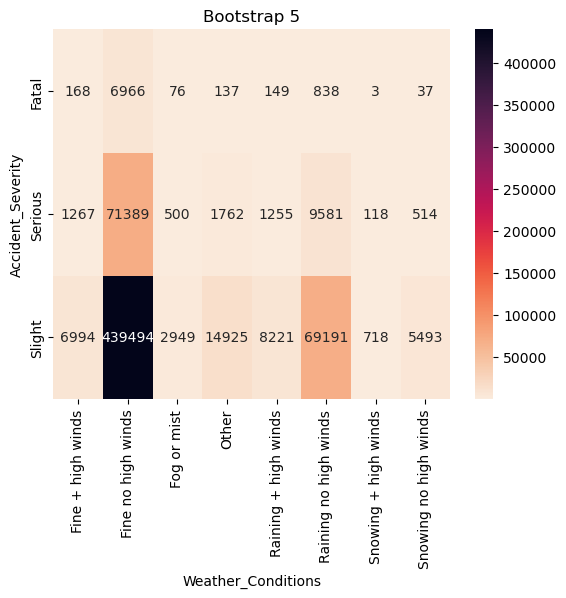

In [38]:
for i in range(num_bootstrap_samples):
    resampled_data = resample(data)
    resampled_crosstab = pd.crosstab(resampled_data['Accident_Severity'], resampled_data['Weather_Conditions'])

    # Chi-square test
    chi2, p, _, _ = chi2_contingency(resampled_crosstab)

    # Expected frequencies
    expected_frequencies = np.outer(resampled_crosstab.sum(axis=1), resampled_crosstab.sum(axis=0)) / resampled_crosstab.sum().sum()

    # Chi-square statistic
    chi2_statistic = np.sum((resampled_crosstab.values - expected_frequencies)**2 / expected_frequencies)

    # Df
    degrees_of_freedom = (resampled_crosstab.shape[0] - 1) * (resampled_crosstab.shape[1] - 1)

    # Critical value and p-value
    critical_value = chi2
    alpha = 0.05
    p_value = p

    # Make a decision
    if chi2_statistic > critical_value or p_value < alpha:
        result = "Reject the null hypothesis: There is a significant association between Weather_Conditions and Accident_Severity."
    else:
        result = "Fail to reject the null hypothesis: There is no significant association between Weather_Conditions and Accident_Severity."

    table = tabulate(resampled_crosstab, headers='keys', tablefmt='pretty')

    if i == num_bootstrap_samples - 1:  
        print(f"\033[1mBootstrap Sample {i + 1} Results:\033[0m")
        print(f"{table}")
        print(f"\033[1mChi-square:\033[0m {chi2_statistic}")
        print(f"\033[1mP-value:\033[0m {p_value}")
        print(f"\033[1mBootstrap Decision: {result}\033[0m\n")

        sns.heatmap(resampled_crosstab, annot=True, fmt="d", cmap="rocket_r")
        plt.title(f"Bootstrap {i + 1}")
        plt.show()

The table and heatmap illustrate the correlation between categorical weather conditions and accident severity. Accidents during fine weather with no high winds are twice as frequent as those during raining with no high winds. Other weather conditions show lower counts. Fine weather with no high winds is associated with an intense level of slight severity, implying that accidents during fine weather are evident but typically with slight severity.

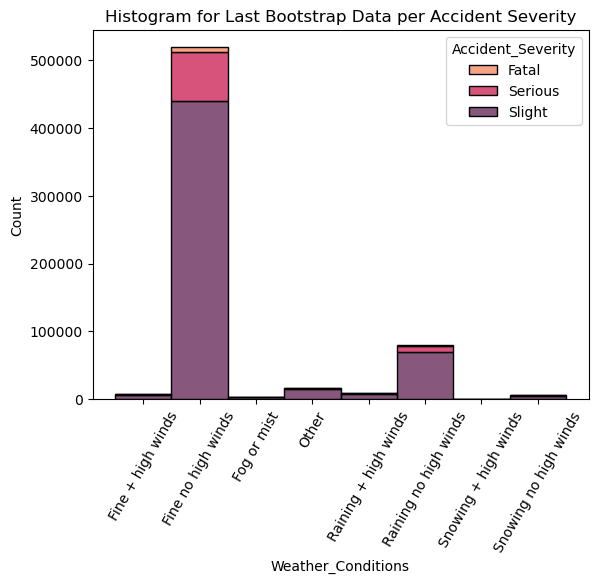

In [39]:
last_bootstrap_data = resampled_data

sns.histplot(data=last_bootstrap_data, x='Weather_Conditions', hue='Accident_Severity', multiple='stack', palette='rocket_r', binwidth=0.001)
plt.xticks(rotation=60)
plt.title("Histogram for Last Bootstrap Data per Accident Severity")
plt.show()

The histogram aligns effectively with the heat map, showing a higher count in fine weather with no high winds after bootstrapping. This condition exhibits a high rating for slight accident severity. In contrast, Malin et al.'s (2019) study highlights poor weather conditions like ice and slippery as extremely hazardous. However, our data findings show relatively low road accidents and severity during snow weather. This suggests complex factors at play, such as experienced drivers navigating snow conditions, potentially lowering the chance of accidents.

After the bootstrap execution, the numerical data are utilized to compute the chi-square and the p-value. Results showed that the chi-squared is 628.0314 while the p-value for road surface conditions is 5.7206e-125. Therefore, the findings occurred to reject the null hypothesis that there is significant association between Weather_Conditions and Accident_Severity. The association between weather conditions and accident severity shows significant influence that contributes to the level of potential road accidents. 

## Vehicle Type
### Vehicle Type Bootstrap Sample

Bootstrap Sample 5 Results:
+-------------------+----------------------+--------------------------------------+--------+------------------------------+-------------------------------+---------------------------------+----------------------------------+----------------------------+---------------------------+---------------------------------------+-----------------------+---------------+-------------+--------------+-----------------------+-------------------------------------+
| Accident_Severity | Agricultural vehicle | Bus or coach (17 or more pass seats) |  Car   | Data missing or out of range | Goods 7.5 tonnes mgw and over | Goods over 3.5t. and under 7.5t | Minibus (8 - 16 passenger seats) | Motorcycle 125cc and under | Motorcycle 50cc and under | Motorcycle over 125cc and up to 500cc | Motorcycle over 500cc | Other vehicle | Pedal cycle | Ridden horse | Taxi/Private hire car | Van / Goods 3.5 tonnes mgw or under |
+-------------------+----------------------+----------------------

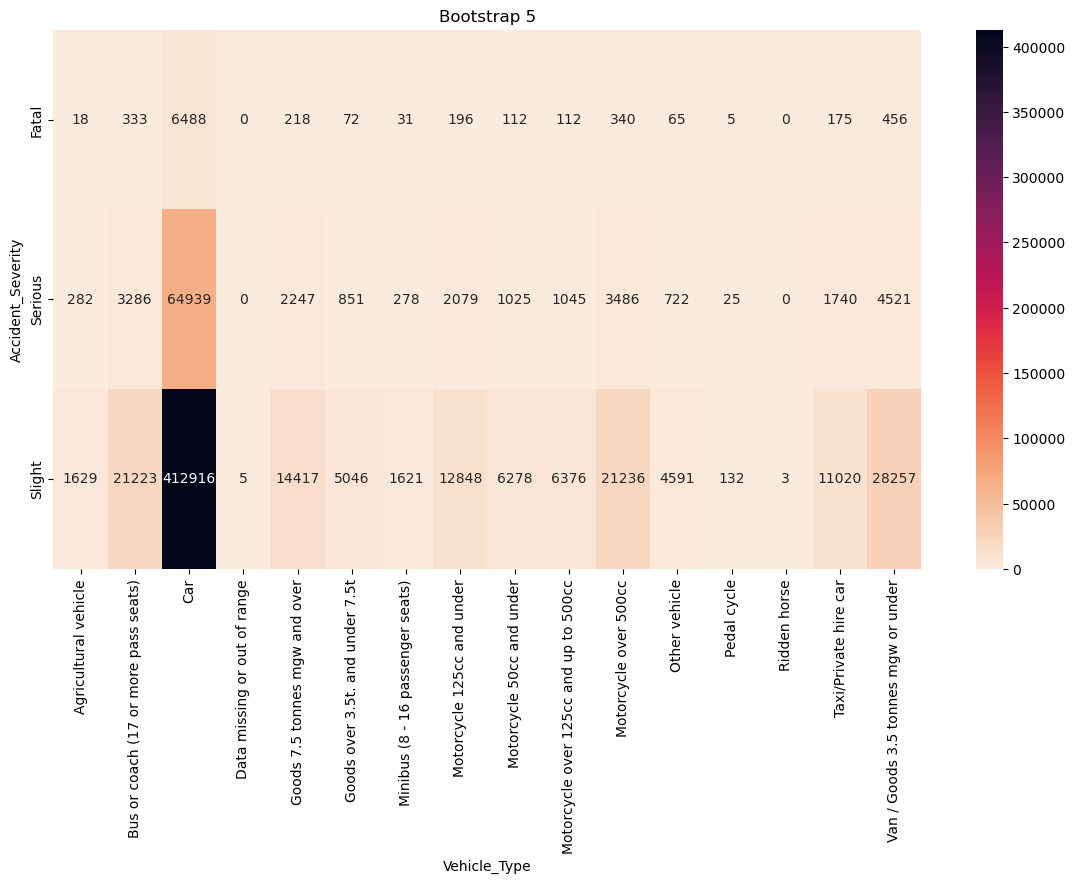

In [40]:
for i in range(num_bootstrap_samples):
    resampled_data = resample(data)
    resampled_crosstab = pd.crosstab(resampled_data['Accident_Severity'], resampled_data['Vehicle_Type'])

    # Chi-square test
    chi2, p, _, _ = chi2_contingency(resampled_crosstab)

    # Expected frequencies
    expected_frequencies = np.outer(resampled_crosstab.sum(axis=1), resampled_crosstab.sum(axis=0)) / resampled_crosstab.sum().sum()

    # Chi-square statistic
    chi2_statistic = np.sum((resampled_crosstab.values - expected_frequencies)**2 / expected_frequencies)

    # Df
    degrees_of_freedom = (resampled_crosstab.shape[0] - 1) * (resampled_crosstab.shape[1] - 1)

    # Critical value and p-value
    critical_value = chi2
    alpha = 0.05
    p_value = p

    # Make a decision
    if chi2_statistic > critical_value or p_value < alpha:
        result = "Reject the null hypothesis: There is a significant association between Vehicle_Type and Accident_Severity."
    else:
        result = "Fail to reject the null hypothesis: There is no significant association between Vehicle_Type and Accident_Severity."

    table = tabulate(resampled_crosstab, headers='keys', tablefmt='pretty')

    if i == num_bootstrap_samples - 1:  
        print(f"\033[1mBootstrap Sample {i + 1} Results:\033[0m")
        print(f"{table}")
        print(f"\033[1mChi-square:\033[0m {chi2_statistic}")
        print(f"\033[1mP-value:\033[0m {p_value}")
        print(f"\033[1mBootstrap Decision: {result}\033[0m\n")

        fig, ax = plt.subplots(figsize=(14, 7))
        sns.heatmap(resampled_crosstab, annot=True, fmt="d", cmap="rocket_r", ax=ax)
        plt.title(f"Bootstrap {i + 1}")
        plt.show()

The table and heatmap depict the correlation between categorical vehicle types and accident severity. The findings reveal that accidents involving cars are significantly higher compared to other vehicle types. This implies that the use of cars is more prone to road accidents, typically with slight severity.

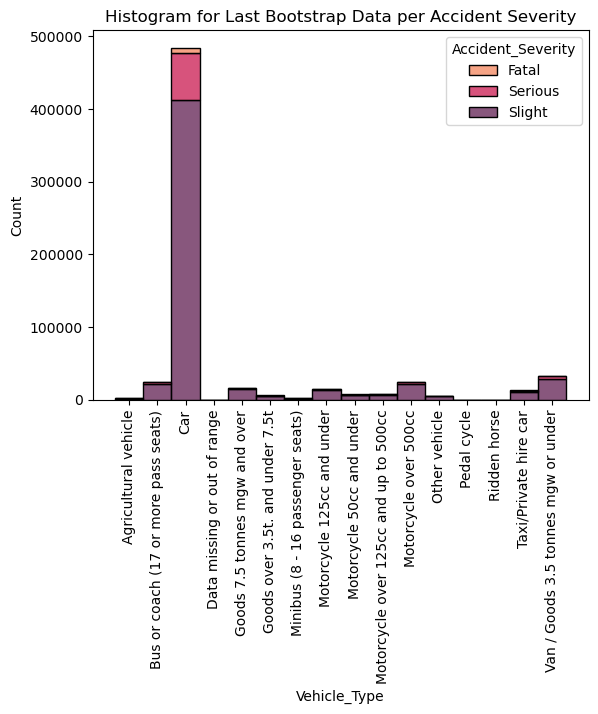

In [41]:
last_bootstrap_data = resampled_data

sns.histplot(data=last_bootstrap_data, x='Vehicle_Type', hue='Accident_Severity', multiple='stack', palette='rocket_r', binwidth=0.001)
plt.xticks(rotation=90)
plt.title("Histogram for Last Bootstrap Data per Accident Severity")
plt.show()

The histogram aligns effectively with the heat map, indicating a higher count for the vehicle type of car after bootstrapping, with a predominant rating for slight accident severity. Chand et al. (2021) support this finding, stating that two-wheelers, heavyweight automobiles, and passenger cars pose a higher risk of road accidents compared to cycling, pedestrian use, and public transportation. This suggests that cars have a significant correlation with potential road damages.

After bootstrapping, the chi-squared is 61.8632 with a p-value of 0.0005 for Vehicle_Type and Accident_Severity. Rejecting the null hypothesis indicates a significant association between vehicle type and accident severity. This implies that the choice of vehicle by an individual correlates with potential road accidents, particularly with slight severity. The findings suggest that vehicle features significantly influence the likelihood and severity of road accidents, with cars having a notable contribution to slight accident severity.

Dry roads and fine weather without high winds emerged as high-risk contributors, predominantly resulting in accidents with slight severity. Furthermore, the hypothesis testing and bootstrapping results reveal that road surface and weather conditions have a significant association with accident severity, while the decision regarding vehicle type differs, but bootstrapping indicates a significant association with accident severity as well. Lastly, geospatial analysis provides insights into road safety geography. Overall, this study emphasizes the significance of road surface condition, weather condition, and vehicle type in influencing accident severity in London district areas.

---
---